<h1 align="center"> Практична робота № 4 </h1>
<h2 align="center"> <b> Класифікація методом KNN </b> </h2>
<hr> <h3 align="center">Виконав студент групи ФБ-35 Куб'юк Дмитро </h3>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

Дані беруться з 2 дз з оптимальною кількістю кластерів для K means.

In [97]:
data = pd.read_csv("winequality_clustered.csv")

scaler = StandardScaler()
X = data.drop(columns=["quality", "type", "cluster"])
X_scaled = scaler.fit_transform(X)

y = data["cluster"]

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,cluster
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
2,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,1
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,1
4,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red,1


Поділити вибірку на тестову та начальну.

In [98]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0, stratify=y)

Розрахувати скільки потрібно обрати найближчих записів, щоб точність була не нижче 85%.

In [99]:
best_k = None
best_acc = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}, точність = {acc:.3f}")
    
    if acc > best_acc:
        best_acc = acc
        best_k = k

k = 1, точність = 0.985
k = 2, точність = 0.979
k = 3, точність = 0.983
k = 4, точність = 0.981
k = 5, точність = 0.978
k = 6, точність = 0.980
k = 7, точність = 0.981
k = 8, точність = 0.979
k = 9, точність = 0.979
k = 10, точність = 0.980
k = 11, точність = 0.984
k = 12, точність = 0.982
k = 13, точність = 0.981
k = 14, точність = 0.981
k = 15, точність = 0.981
k = 16, точність = 0.981
k = 17, точність = 0.983
k = 18, точність = 0.984
k = 19, точність = 0.986
k = 20, точність = 0.985


При k=1 точність становить 98.5% - це означає, що сусід найчастіше належить до того самого кластеру, тобто межі кластерів дуже чисті. Проте, щоб зробити модель більш стійкою до можливих шумів, оберу k=19.

Зробити крос валідацію на 3 блоках.

In [100]:
knn = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(knn, X_scaled, y, cv=3)

print(f"Точності крос-валідації: {cv_scores}")
print(f"Середня точність крос-валідації: {cv_scores.mean():.3f}")

Точності крос-валідації: [0.96210207 0.97978777 0.95654371]
Середня точність крос-валідації: 0.966


Додатково ще візуалізую поділ на класи.

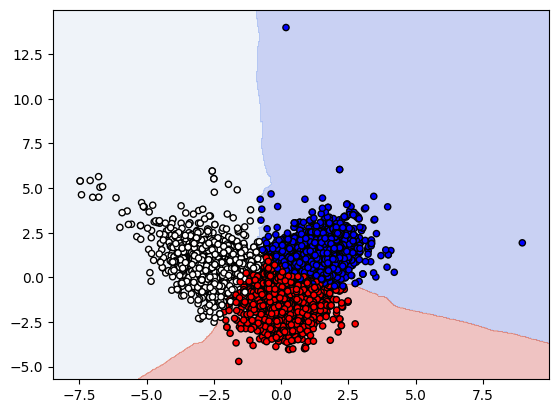

In [101]:
knn.fit(X_pca, y)

x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='bwr', edgecolors='k', s=20)
plt.show()

Якщо порівняти графіки з ДЗ3 (метод опорних векторів) та ДЗ4 (KNN), то можна помітити, що межі кластерів у KNN виглядають менш гладкими. Це пояснюється тим, що у методі опорних векторів знаходиться оптимальна гіперплощина, яка максимально розділяє класи, тоді як у KNN класи визначаються на основі голосування k найближчих сусідів, через що межі стають більш “зубчастими” і нерівними.